In [103]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [14]:
x,y = load_diabetes(return_X_y=True,as_frame=True)

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
y_train

17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
       ...  
106    134.0
270    202.0
348    148.0
435     64.0
102    302.0
Name: target, Length: 353, dtype: float64

### Using Lasso regression with different values of alpha. 
Lasso actually performs feature selection on high values of alpha. It makes certain small coeffs zero and removes them over further increasing the value of alpha. 
In ridge regression , as alpha increases, coeffs decrease or shrink towards zero but they never become zero.
Lasso is useful when dealing with higher dimensions as it performs feature selection and drops feautures which don't contribute much towards achieving target output.

In [20]:
model = Lasso(alpha=0.1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.coef_ , model.intercept_

(array([   0.        , -152.66706552,  552.6941724 ,  303.37055083,
         -81.3648345 ,   -0.        , -229.25829816,    0.        ,
         447.91818931,   29.64235375]),
 151.57488311231123)

C:\Users\arsal\AppData\Local\Temp\ipykernel_12588\3402582286.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train,y_train)
C:\Users\arsal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\arsal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


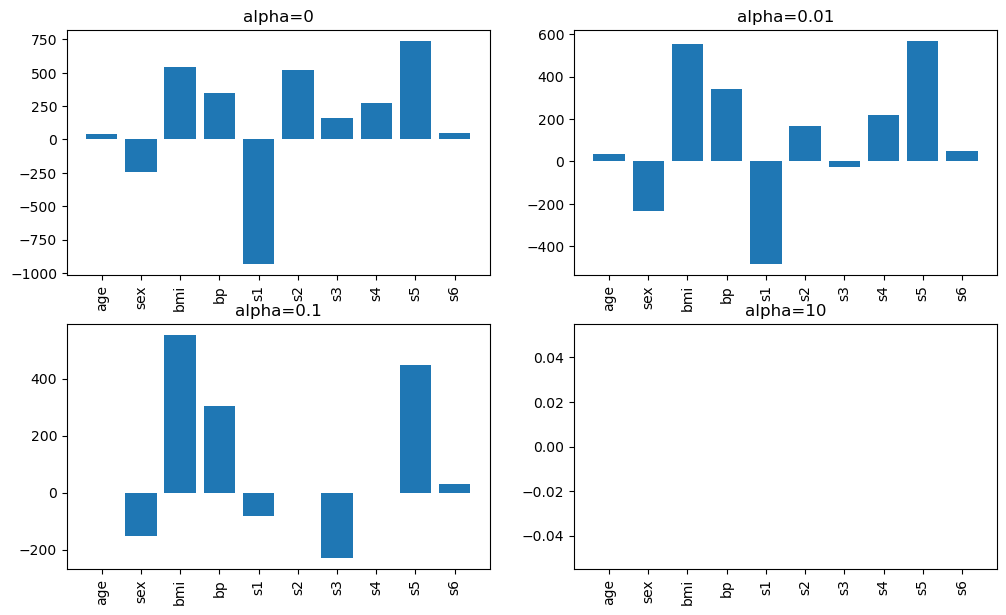

In [80]:
coef = dict()
for alpha in [0,0.01,0.1,10,100]:
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    coef.update({alpha: model.coef_})
alphas = list(coef.keys())
plt.rcParams['figure.figsize'] = 12,7

plt.subplot(221)
plt.bar(x=x_train.columns,height =coef[alphas[0]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[0]}')

plt.subplot(222)
plt.bar(x=x_train.columns,height =coef[alphas[1]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[1]}')

plt.subplot(223)
plt.bar(x=x_train.columns,height =coef[alphas[2]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[2]}')

plt.subplot(224)
plt.bar(x=x_train.columns,height =coef[alphas[3]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[3]}')

plt.show()

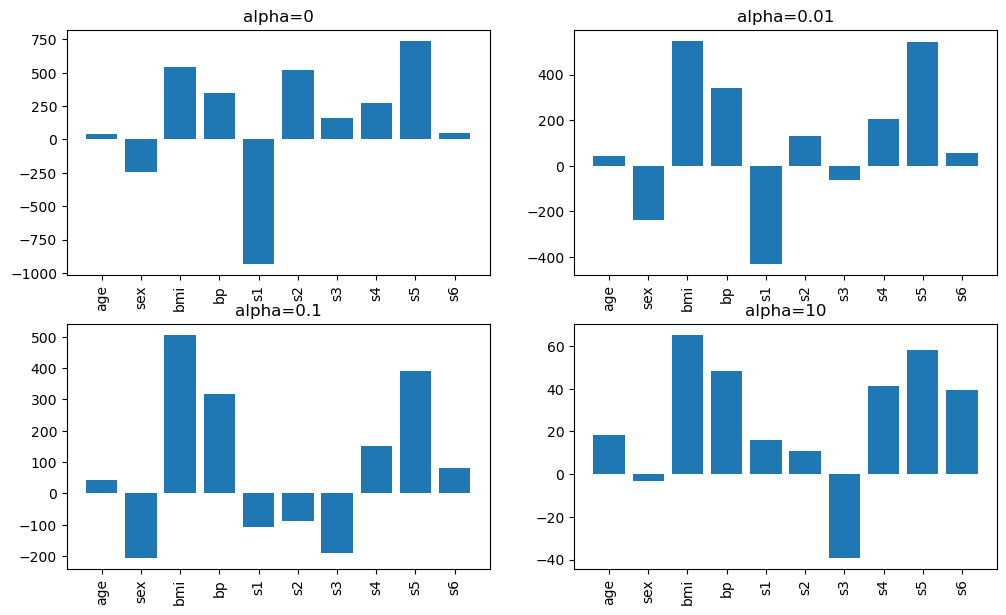

In [81]:
##test with Ridge
coef = dict()
for alpha in [0,0.01,0.1,10,100]:
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    coef.update({alpha: model.coef_})
alphas = list(coef.keys())
plt.rcParams['figure.figsize'] = 12,7

plt.subplot(221)
plt.bar(x=x_train.columns,height =coef[alphas[0]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[0]}')

plt.subplot(222)
plt.bar(x=x_train.columns,height =coef[alphas[1]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[1]}')

plt.subplot(223)
plt.bar(x=x_train.columns,height =coef[alphas[2]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[2]}')

plt.subplot(224)
plt.bar(x=x_train.columns,height =coef[alphas[3]])
plt.xticks(rotation=90)
plt.title(f'alpha={alphas[3]}')

plt.show()

### Using elastic net regression which is a combination of ridge and lasso.

In [115]:
pipe = Pipeline([('elastic',ElasticNet(alpha=1,l1_ratio=0.5))])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

-0.0024651935487560728

### use hyperparameter tuning with gridsearchcv to search for optimal values of alpha and l1

In [116]:
params = { #'elastic__alpha':[0.5,1.0,1.5],
             'elastic__l1_ratio':[0.02,0.2,0.5,0.9]}
grid = GridSearchCV(pipe,params,cv=10,scoring='r2')
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)
r2_score(y_test,y_pred)

0.017799345846951975

In [ ]:
sorted(metrics.SCORERS.keys())

In [117]:
grid.best_score_ , grid.best_params_

(-0.04195076228896062, {'elastic__l1_ratio': 0.9})